<a href="https://colab.research.google.com/github/BenRyan-8/APA_CA/blob/main/BERPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install openpyxl

In [4]:
import pandas as pd
import openpyxl

df = pd.read_excel('/content/drive/MyDrive/FourthYear/APA/BERPublicsearch.xlsx', nrows=100000)

In [5]:
df.columns.tolist()

['CountyName',
 'DwellingTypeDescr',
 'Year_of_Construction',
 'TypeofRating',
 'EnergyRating',
 'BerRating',
 'GroundFloorArea(sq m)',
 'UValueWall',
 'UValueRoof',
 'UValueFloor',
 'UValueWindow',
 'UvalueDoor',
 'WallArea',
 'RoofArea',
 'FloorArea',
 'WindowArea',
 'DoorArea',
 'NoStoreys',
 'CO2Rating',
 'MainSpaceHeatingFuel',
 'MainWaterHeatingFuel',
 'HSMainSystemEfficiency',
 'MultiDwellingMPRN',
 'TGDLEdition',
 'MPCDERValue',
 'HSEffAdjFactor',
 'HSSupplHeatFraction',
 'HSSupplSystemEff',
 'WHMainSystemEff',
 'WHEffAdjFactor',
 'SupplSHFuel',
 'SupplWHFuel',
 'SHRenewableResources',
 'WHRenewableResources',
 'NoOfChimneys',
 'NoOfOpenFlues',
 'NoOfFansAndVents',
 'NoOfFluelessGasFires',
 'DraftLobby',
 'VentilationMethod',
 'FanPowerManuDeclaredValue',
 'HeatExchangerEff',
 'StructureType',
 'SuspendedWoodenFloor',
 'PercentageDraughtStripped',
 'NoOfSidesSheltered',
 'PermeabilityTest',
 'PermeabilityTestResult',
 'TempAdjustment',
 'HeatSystemControlCat',
 'HeatSystemRespo

#Data Cleaning

In [6]:
cols_to_remove = [

    # DIRECT BER COMPONENTS
    "BerRating",
    "CO2Rating",

    # DELIVERED ENERGY FIELDS
    "DeliveredLightingEnergy",
    "DeliveredEnergyPumpsFans",
    "DeliveredEnergyMainWater",
    "DeliveredEnergyMainSpace",
    "DeliveredEnergySecondarySpace",
    "DeliveredEnergySupplementaryWater",
    "TotalDeliveredEnergy",

    # PRIMARY ENERGY FIELDS
    "PrimaryEnergyLighting",
    "PrimaryEnergyPumpsFans",
    "PrimaryEnergyMainWater",
    "PrimaryEnergyMainSpace",
    "PrimaryEnergySecondarySpace",
    "PrimaryEnergySupplementaryWater",

    # CO2 EMISSIONS FIELDS
    "CO2Lighting",
    "CO2PumpsFans",
    "CO2MainWater",
    "CO2MainSpace",
    "CO2SecondarySpace",
    "CO2SupplementaryWater",

    # DEAP COMPLIANCE & PERFORMANCE COEFFICIENTS
    "CPC",
    "EPC",
    "RER",
    "RenewEPnren",
    "RenewEPren",

    # HIGHLY DERIVED / SEMI-LEAKAGE FIELDS
    "LivingAreaPercent",

    # RENEWABLE ENERGY SUBCOMPONENT FIELDS
    # Renewable Energy 1
    "FirstEnergyTypeId",
    "FirstEnergyType_Description",
    "FirstEnerProdComment",
    "FirstEnerProdDelivered",
    "FirstPartLTotalContribution",
    "FirstEnerProdConvFactor",
    "FirstEnerProdCO2EmissionFactor",
    "FirstEnerConsumedComment",
    "FirstEnerConsumedDelivered",
    "FirstEnerConsumedConvFactor",
    "FirstEnerConsumedCO2EmissionFactor",

    # Renewable Energy 2
    "SecondEnergyTypeId",
    "SecondEnergyType_Description",
    "SecondEnerProdComment",
    "SecondEnerProdDelivered",
    "SecondPartLTotalContribution",
    "SecondEnerProdConvFactor",
    "SecondEnerProdCO2EmissionFactor",
    "SecondEnerConsumedComment",
    "SecondEnerConsumedDelivered",
    "SecondEnerConsumedConvFactor",
    "SecondEnerConsumedCO2EmissionFactor",

    # Renewable Energy 3
    "ThirdEnergyTypeId",
    "ThirdEnergyType_Description",
    "ThirdEnerProdComment",
    "ThirdEnerProdDelivered",
    "ThirdPartLTotalContribution",
    "ThirdEnerProdConvFactor",
    "ThirdEnerProdCO2EmissionFactor",
    "ThirdEnerConsumedComment",
    "ThirdEnerConsumedDelivered",
    "ThirdEnerConsumedConvFactor",
    "ThirdEnerConsumedCO2EmissionFactor",

    # GROUP HEATING SCHEME FIELDS
    "ChargingBasisHeatConsumed",
    "gsdHSSupplHeatFraction",
    "gsdHSSupplSystemEff",
    "DistLossFactor",
    "CHPUnitHeatFraction",
    "CHPSystemType",
    "CHPElecEff",
    "CHPHeatEff",
    "CHPFuelType",
    "SupplHSFuelTypeID",
    "gsdSHRenewableResources",
    "gsdWHRenewableResources",
    "SolarHeatFraction",
    "TotalPrimaryEnergyFact",
    "TotalCO2Emissions",

    # WALL-BY-WALL STRUCTURE FIELDS

    # First wall (GA → GG)
    "FirstWallType_Description",
    "FirstWallDescription",
    "FirstWallArea",
    "FirstWallUValue",
    "FirstWallIsSemiExposed",
    "FirstWallAgeBandId",
    "FirstWallTypeId",

    # Second wall (GH → GN)
    "SecondWallType_Description",
    "SecondWallDescription",
    "SecondWallArea",
    "SecondWallUValue",
    "SecondWallIsSemiExposed",
    "SecondWallAgeBandId",
    "SecondWallTypeId",

    # Third wall (GO → GU)
    "ThirdWallType_Description",
    "ThirdWallDescription",
    "ThirdWallArea",
    "ThirdWallUValue",
    "ThirdWallIsSemiExposed",
    "ThirdWallAgeBandId",
    "ThirdWallTypeId",

    # MISCELLANEOUS STRUCTURAL FIELDS
    "UndergroundHeating",
    "GroundFloorUValue",
    "LowEnergyLightingPercent",
    "RoomInRoofArea",
    "PurposeOfRating",
    "DateOfAssessment",
    "VolumeOfPreHeatStore",

    # SPATIAL METADATA
    "SA_Code",
    "prob_smarea_error_0corr",
    "prob_smarea_error_100corr",
]


In [7]:
df.drop(columns=cols_to_remove, inplace=True)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the percentage of missing values for each column
missing_data = df.isnull().sum() / len(df) * 100

# Filter out columns with no missing data if desired, or sort for better visualization
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)


Heatmap overview of missing data

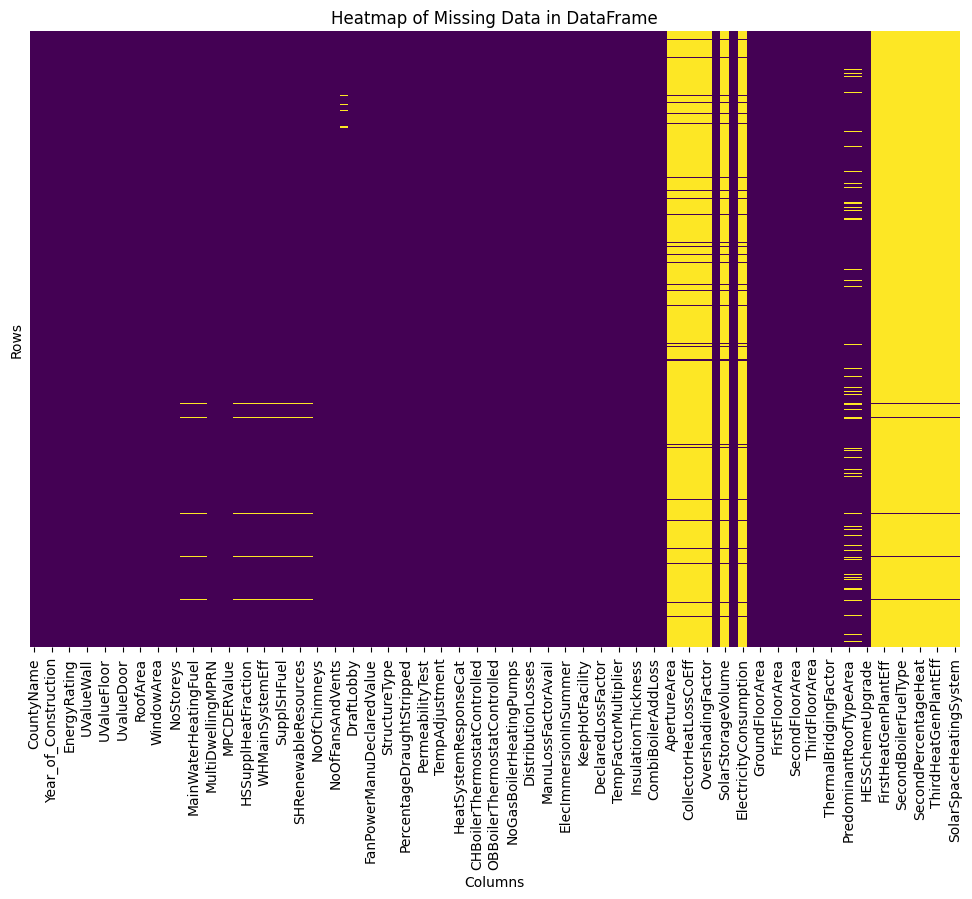

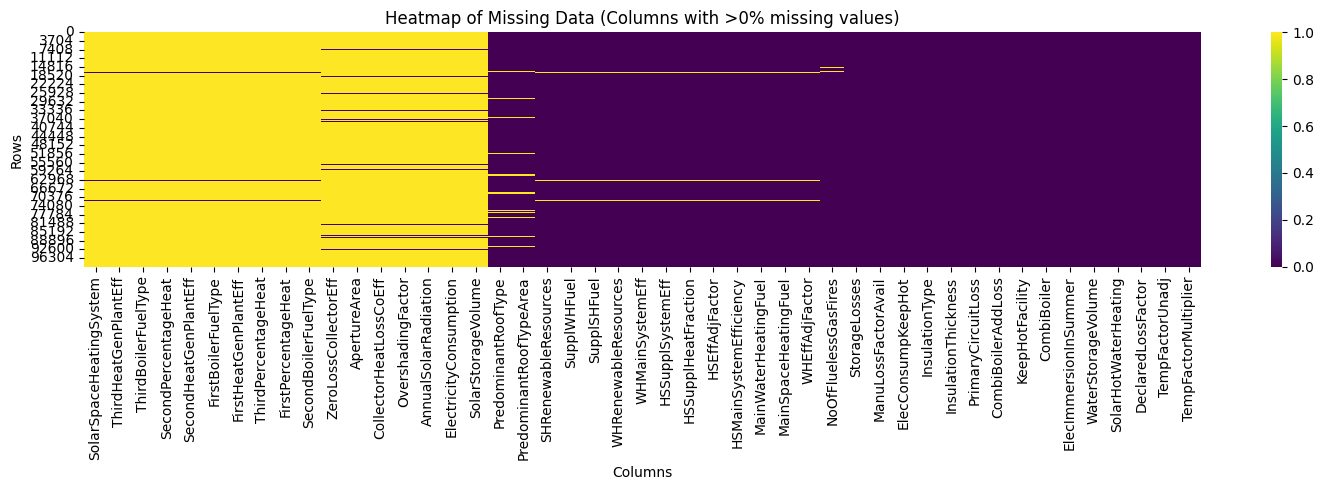

In [9]:
# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    df.isnull(),
    cbar=False,
    cmap='viridis',
    yticklabels=False # Hide yticklabels as it's hard to read for large DFs
)
plt.title('Heatmap of Missing Data in DataFrame')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

# A more detailed heatmap of only columns with missing values (if `missing_data` Series is not empty)
if not missing_data.empty:
    plt.figure(figsize=(15, 5))
    sns.heatmap(
        df[missing_data.index].isnull(),
        cbar=True,
        cmap='viridis'
    )
    plt.title('Heatmap of Missing Data (Columns with >0% missing values)')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("No columns with missing values to display a detailed heatmap.")


In [10]:
threshold = 0.9

# Identify columns with > 90% missing
cols_over_90_missing = df.columns[df.isna().mean() > threshold].tolist()

print("Columns with >90% missing:", cols_over_90_missing)
cols_over_90_missing

Columns with >90% missing: ['ApertureArea', 'ZeroLossCollectorEff', 'CollectorHeatLossCoEff', 'AnnualSolarRadiation', 'OvershadingFactor', 'SolarStorageVolume', 'ElectricityConsumption', 'FirstBoilerFuelType', 'FirstHeatGenPlantEff', 'FirstPercentageHeat', 'SecondBoilerFuelType', 'SecondHeatGenPlantEff', 'SecondPercentageHeat', 'ThirdBoilerFuelType', 'ThirdHeatGenPlantEff', 'ThirdPercentageHeat', 'SolarSpaceHeatingSystem']


['ApertureArea',
 'ZeroLossCollectorEff',
 'CollectorHeatLossCoEff',
 'AnnualSolarRadiation',
 'OvershadingFactor',
 'SolarStorageVolume',
 'ElectricityConsumption',
 'FirstBoilerFuelType',
 'FirstHeatGenPlantEff',
 'FirstPercentageHeat',
 'SecondBoilerFuelType',
 'SecondHeatGenPlantEff',
 'SecondPercentageHeat',
 'ThirdBoilerFuelType',
 'ThirdHeatGenPlantEff',
 'ThirdPercentageHeat',
 'SolarSpaceHeatingSystem']

In [11]:
# Filter the missing_data Series to include only columns identified as having >90% missing
missing_data_over_90 = missing_data[missing_data.index.isin(cols_over_90_missing)]

print("Columns with over 90% missing data and their percentages:")
display(missing_data_over_90.sort_values(ascending=False))


Columns with over 90% missing data and their percentages:


,0
SolarSpaceHeatingSystem,98.673
ThirdHeatGenPlantEff,98.673
ThirdBoilerFuelType,98.673
SecondPercentageHeat,98.673
SecondHeatGenPlantEff,98.673
FirstBoilerFuelType,98.673
FirstHeatGenPlantEff,98.673
ThirdPercentageHeat,98.673
FirstPercentageHeat,98.673
SecondBoilerFuelType,98.673


In [12]:
# Drop them
df.drop(columns=cols_over_90_missing, inplace=True)

dropping columns that only contain one value as it doesn't provide any value to the model

In [13]:
cols_to_drop_single_value = []
for col in df.columns:
    if df[col].nunique() == 1:
        cols_to_drop_single_value.append(col)

if cols_to_drop_single_value:
    print(f"Dropping {len(cols_to_drop_single_value)} columns with only one unique value: {cols_to_drop_single_value}")
    df.drop(columns=cols_to_drop_single_value, inplace=True)
    print("Columns dropped successfully.")
else:
    print("No columns found with only one unique value.")

# Display the shape of the DataFrame after dropping columns
print(f"New DataFrame shape: {df.shape}")

No columns found with only one unique value.
New DataFrame shape: (100000, 88)


Checking for how rare the A ratings are and then grouping them into just A

In [14]:
df["EnergyRating"].value_counts().sort_index()


,count
EnergyRating,
A1,1
A2,213
A3,1794
B1,1307
B2,2244
B3,6288
C1,10671
C2,12950
C3,13023


In [15]:
df["EnergyRating"] = df["EnergyRating"].replace({"A1":"A", "A2":"A", "A3":"A"})

In [16]:
# Remove leading/trailing whitespace and uppercase just in case
df["EnergyRating"] = df["EnergyRating"].astype(str).str.strip().str.upper()


In [17]:
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
final_rows = df.shape[0]

print(f"Number of duplicate rows dropped: {initial_rows - final_rows}")

Number of duplicate rows dropped: 1810


#Imputation

In [18]:
import numpy as np

# Identify column types automatically
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

In [19]:
numeric_cols, categorical_cols

(['Year_of_Construction',
  'GroundFloorArea(sq m)',
  'UValueWall',
  'UValueRoof',
  'UValueFloor',
  'UValueWindow',
  'UvalueDoor',
  'WallArea',
  'RoofArea',
  'FloorArea',
  'WindowArea',
  'DoorArea',
  'NoStoreys',
  'HSMainSystemEfficiency',
  'TGDLEdition',
  'MPCDERValue',
  'HSEffAdjFactor',
  'HSSupplHeatFraction',
  'HSSupplSystemEff',
  'WHMainSystemEff',
  'WHEffAdjFactor',
  'SupplSHFuel',
  'SupplWHFuel',
  'SHRenewableResources',
  'WHRenewableResources',
  'NoOfChimneys',
  'NoOfOpenFlues',
  'NoOfFansAndVents',
  'NoOfFluelessGasFires',
  'FanPowerManuDeclaredValue',
  'HeatExchangerEff',
  'PercentageDraughtStripped',
  'NoOfSidesSheltered',
  'PermeabilityTestResult',
  'TempAdjustment',
  'HeatSystemControlCat',
  'HeatSystemResponseCat',
  'NoCentralHeatingPumps',
  'NoOilBoilerHeatingPumps',
  'NoGasBoilerHeatingPumps',
  'DistributionLosses',
  'WaterStorageVolume',
  'DeclaredLossFactor',
  'TempFactorUnadj',
  'TempFactorMultiplier',
  'InsulationThickness

##Numerical Imputation

In [20]:

numerical_but_categorical = [
    "TGDLEdition",
    "HeatSystemControlCat",
    "HeatSystemResponseCat",
    "ThermalMassCategory",
    "PredominantRoofType",
    'SupplSHFuel',
    'SupplWHFuel',
    'SHRenewableResources',
    'WHRenewableResources',
    'HESSchemeUpgrade'
]

# Move overrides into categorical
for col in numerical_but_categorical:
    if col in numeric_cols:
        numeric_cols.remove(col)
    if col not in categorical_cols:
        categorical_cols.append(col)

df[numerical_but_categorical] = df[numerical_but_categorical].astype("str")


##Categorical Imputation

In [21]:
def inspect_no_none_usage(df, categorical_cols):
    results = []

    for col in categorical_cols:
        uniques = df[col].dropna().unique()

        uses_no = any(
            str(v).strip().lower() == "no" for v in uniques
        )
        uses_none = any(
            str(v).strip().lower() == "none" for v in uniques
        )

        if uses_no or uses_none:
            results.append({
                "column": col,
                "uses_No": uses_no,
                "uses_None": uses_none,
                "unique_values": uniques
            })

    return pd.DataFrame(results)

# Run it
usage_df = inspect_no_none_usage(df, categorical_cols)

usage_df


,column,uses_No,uses_None,unique_values
0,MultiDwellingMPRN,True,False,"[NO, YES]"
1,DraftLobby,True,False,"[NO, YES]"
2,SuspendedWoodenFloor,True,False,"[No , Yes (Sealed) ..."
3,PermeabilityTest,True,False,"[NO, YES]"
4,CHBoilerThermostatControlled,True,False,"[YES, NO ]"
5,OBBoilerThermostatControlled,True,False,"[YES, NO ]"
6,OBPumpInsideDwelling,True,False,"[NO , YES]"
7,WarmAirHeatingSystem,True,False,"[NO , YES]"
8,StorageLosses,True,False,"[YES, NO ]"
9,ManuLossFactorAvail,True,False,"[NO , YES]"


In [22]:
impute_no = []
impute_none = []
impute_unknown = []

for col in categorical_cols:
    uniques = df[col].dropna().unique()
    lower_uniques = [str(u).strip().lower() for u in uniques]

    uses_no = "no" in lower_uniques
    uses_none = "none" in lower_uniques

    if uses_no and not uses_none:
        impute_no.append(col)
    elif uses_none and not uses_no:
        impute_none.append(col)
    else:
        impute_unknown.append(col)


In [23]:
impute_no, impute_none, impute_unknown

(['MultiDwellingMPRN',
  'DraftLobby',
  'SuspendedWoodenFloor',
  'PermeabilityTest',
  'CHBoilerThermostatControlled',
  'OBBoilerThermostatControlled',
  'OBPumpInsideDwelling',
  'WarmAirHeatingSystem',
  'StorageLosses',
  'ManuLossFactorAvail',
  'SolarHotWaterHeating',
  'ElecImmersionInSummer',
  'CylinderStat',
  'CombinedCylinder',
  'SWHPumpSolarPowered'],
 ['CombiBoiler', 'KeepHotFacility', 'InsulationType', 'PrimaryCircuitLoss'],
 ['CountyName',
  'DwellingTypeDescr',
  'TypeofRating',
  'EnergyRating',
  'MainSpaceHeatingFuel',
  'MainWaterHeatingFuel',
  'VentilationMethod',
  'StructureType',
  'ThermalMassCategory',
  'PredominantRoofType',
  'TGDLEdition',
  'HeatSystemControlCat',
  'HeatSystemResponseCat',
  'SupplSHFuel',
  'SupplWHFuel',
  'SHRenewableResources',
  'WHRenewableResources',
  'HESSchemeUpgrade'])

In [24]:
logical_zero_cols = [
    'HSSupplHeatFraction',
    'HSSupplSystemEff',
    'FanPowerManuDeclaredValue',
    'HeatExchangerEff'
]

for col in logical_zero_cols:
    if col in df.columns:
        df[col] = df[col].fillna(0)


In [25]:
df[impute_no] = df[impute_no].fillna("NO")
df[impute_none] = df[impute_none].fillna("None")
df[impute_unknown] = df[impute_unknown].fillna("Unknown")

In [26]:
print("Columns subject to median imputation:")
print(numeric_cols)

print("\nMissing values in these columns before imputation:")
print(df[numeric_cols].isnull().sum())

Columns subject to median imputation:
['Year_of_Construction', 'GroundFloorArea(sq m)', 'UValueWall', 'UValueRoof', 'UValueFloor', 'UValueWindow', 'UvalueDoor', 'WallArea', 'RoofArea', 'FloorArea', 'WindowArea', 'DoorArea', 'NoStoreys', 'HSMainSystemEfficiency', 'MPCDERValue', 'HSEffAdjFactor', 'HSSupplHeatFraction', 'HSSupplSystemEff', 'WHMainSystemEff', 'WHEffAdjFactor', 'NoOfChimneys', 'NoOfOpenFlues', 'NoOfFansAndVents', 'NoOfFluelessGasFires', 'FanPowerManuDeclaredValue', 'HeatExchangerEff', 'PercentageDraughtStripped', 'NoOfSidesSheltered', 'PermeabilityTestResult', 'TempAdjustment', 'NoCentralHeatingPumps', 'NoOilBoilerHeatingPumps', 'NoGasBoilerHeatingPumps', 'DistributionLosses', 'WaterStorageVolume', 'DeclaredLossFactor', 'TempFactorUnadj', 'TempFactorMultiplier', 'InsulationThickness', 'CombiBoilerAddLoss', 'ElecConsumpKeepHot', 'GroundFloorArea', 'GroundFloorHeight', 'FirstFloorArea', 'FirstFloorHeight', 'SecondFloorArea', 'SecondFloorHeight', 'ThirdFloorArea', 'ThirdFloorH

In [27]:
from sklearn.impute import SimpleImputer

median_imputer = SimpleImputer(strategy="median")

df[numeric_cols] = median_imputer.fit_transform(df[numeric_cols])

Removing rows that don't contain an energy rating

In [28]:
original_len = len(df)
df = df[df["EnergyRating"] != "Unknown"]
new_len = len(df)

print(f"Removed {original_len - new_len} rows with unknown EnergyRating.")


Removed 0 rows with unknown EnergyRating.


In [29]:
df.isna().sum().sum()


np.int64(0)

In [30]:
df_clean = df.copy()
df_target = df["EnergyRating"]

In [31]:
df["CountyName"] = df["CountyName"].replace(
    to_replace=r".*Dublin.*",
    value="Co. Dublin",
    regex=True
)


In [32]:
tree_df = df.copy()
logreg_df = df.copy()

logreg_df.drop(columns=["EnergyRating"], inplace=True)

print("Tree-based dataset shape:", tree_df.shape)
tree_df.head()


Tree-based dataset shape: (98190, 88)


,CountyName,DwellingTypeDescr,Year_of_Construction,TypeofRating,EnergyRating,GroundFloorArea(sq m),UValueWall,UValueRoof,UValueFloor,UValueWindow,...,FirstFloorHeight,SecondFloorArea,SecondFloorHeight,ThirdFloorArea,ThirdFloorHeight,ThermalBridgingFactor,ThermalMassCategory,PredominantRoofTypeArea,PredominantRoofType,HESSchemeUpgrade
0,Co. Wexford,Detached house,2000.0,Existing,B3,233.78,0.28,0.23,0.41,2.71,...,2.4,0.0,0.0,0.0,0.0,0.15,Medium,87.456,Pitch Roof-Insul.on Ceiling,1
1,Galway City,Semi-detached house,1982.0,Existing,C2,108.58,0.27,0.13,0.57,1.34,...,2.7,0.0,0.0,0.0,0.0,0.15,Medium,54.290,Pitch Roof-Insul.on Ceiling,1
2,Co. Galway,Top-floor apartment,2002.0,Existing,C3,72.38,0.27,0.13,0.00,2.70,...,0.0,0.0,0.0,0.0,0.0,0.15,Medium-low,72.380,Pitch Roof-Insul.on Ceiling,1
3,Co. Galway,Top-floor apartment,2002.0,Existing,C3,72.38,0.27,0.13,0.00,2.70,...,0.0,0.0,0.0,0.0,0.0,0.15,Medium-low,72.380,Pitch Roof-Insul.on Ceiling,1
4,Co. Galway,Top-floor apartment,2002.0,Existing,D1,60.30,0.27,0.13,0.00,2.70,...,0.0,0.0,0.0,0.0,0.0,0.15,Medium-low,60.300,Pitch Roof-Insul.on Ceiling,1


#Encoding Categorical Features

In [33]:
#not binary
impute_no.remove("SuspendedWoodenFloor")


binary_cols = impute_no

literally just all the different categorical columns to be encoded.

*Still need to go through this and clean it up*

In [34]:
binary_cols = impute_no

fuel_cols = [
    "MainSpaceHeatingFuel",
    "MainWaterHeatingFuel",
    "SupplSHFuel",
    "SupplWHFuel",
    "SHRenewableResources",
    "WHRenewableResources",
]
dwelling_cols = [
    "DwellingTypeDescr",
    "StructureType"
]
ventilation_cols = ["VentilationMethod"]
categorical_code_cols = [
    "TGDLEdition",
    "HeatSystemControlCat",
    "HeatSystemResponseCat",
    "ThermalMassCategory",
    "PredominantRoofType"
]
location_cols = ["CountyName"]
other_categoricals = impute_unknown
multi_category_cols = ["SuspendedWoodenFloor"]
extra_categoricals = ['CombiBoiler', 'KeepHotFacility', 'InsulationType', 'PrimaryCircuitLoss']


In [35]:
categorical_to_onehot = (
    fuel_cols
    + dwelling_cols
    + ventilation_cols
    + categorical_code_cols
    + location_cols
    + multi_category_cols
    + extra_categoricals
    + [
        col for col in other_categoricals
        if col not in (
            fuel_cols + dwelling_cols + ventilation_cols +
            categorical_code_cols + location_cols + multi_category_cols
        )
    ]
)

categorical_to_onehot.remove("EnergyRating")


In [36]:
#Encoding binary fields
for col in binary_cols:
    logreg_df[col] = logreg_df[col].map({"Yes": 1, "No": 0})


In [37]:
#One-hot encoding all categoricals
logreg_df = pd.get_dummies(
    logreg_df,
    columns=categorical_to_onehot,
    drop_first=False
)

print("Logistic Regression dataset shape:", logreg_df.shape)
logreg_df.head()


Logistic Regression dataset shape: (98190, 240)


,Year_of_Construction,GroundFloorArea(sq m),UValueWall,UValueRoof,UValueFloor,UValueWindow,UvalueDoor,WallArea,RoofArea,FloorArea,...,PrimaryCircuitLoss_Community heating,PrimaryCircuitLoss_Electric immersion heater,PrimaryCircuitLoss_None,PrimaryCircuitLoss_None,PrimaryCircuitLoss_Separate boiler and thermal st,TypeofRating_Existing,TypeofRating_Final,TypeofRating_Provisional,HESSchemeUpgrade_0,HESSchemeUpgrade_1
0,2000.0,233.78,0.28,0.23,0.41,2.71,3.0,137.89,157.26,136.49,...,False,False,False,False,False,True,False,False,False,True
1,1982.0,108.58,0.27,0.13,0.57,1.34,3.0,84.83,54.29,54.29,...,False,False,False,False,False,True,False,False,False,True
2,2002.0,72.38,0.27,0.13,0.00,2.70,0.0,51.98,72.38,0.00,...,False,True,False,False,False,True,False,False,False,True
3,2002.0,72.38,0.27,0.13,0.00,2.70,0.0,51.98,72.38,0.00,...,False,True,False,False,False,True,False,False,False,True
4,2002.0,60.30,0.27,0.13,0.00,2.70,0.0,46.63,60.30,0.00,...,False,True,False,False,False,True,False,False,False,True


In [38]:
# ---- Drop zero-variance columns ----
zero_var_cols = [col for col in logreg_df.columns if logreg_df[col].nunique() <= 1]

if zero_var_cols:
    print(f"Dropping {len(zero_var_cols)} zero-variance columns:")
    print(zero_var_cols)
    logreg_df.drop(columns=zero_var_cols, inplace=True)
else:
    print("No zero-variance columns found.")

print("Logistic Regression dataset shape after cleanup:", logreg_df.shape)


Dropping 14 zero-variance columns:
['MultiDwellingMPRN', 'DraftLobby', 'PermeabilityTest', 'CHBoilerThermostatControlled', 'OBBoilerThermostatControlled', 'OBPumpInsideDwelling', 'WarmAirHeatingSystem', 'StorageLosses', 'ManuLossFactorAvail', 'SolarHotWaterHeating', 'ElecImmersionInSummer', 'CylinderStat', 'CombinedCylinder', 'SWHPumpSolarPowered']
Logistic Regression dataset shape after cleanup: (98190, 226)


In [39]:
logreg_df.columns.tolist()

['Year_of_Construction',
 'GroundFloorArea(sq m)',
 'UValueWall',
 'UValueRoof',
 'UValueFloor',
 'UValueWindow',
 'UvalueDoor',
 'WallArea',
 'RoofArea',
 'FloorArea',
 'WindowArea',
 'DoorArea',
 'NoStoreys',
 'HSMainSystemEfficiency',
 'MPCDERValue',
 'HSEffAdjFactor',
 'HSSupplHeatFraction',
 'HSSupplSystemEff',
 'WHMainSystemEff',
 'WHEffAdjFactor',
 'NoOfChimneys',
 'NoOfOpenFlues',
 'NoOfFansAndVents',
 'NoOfFluelessGasFires',
 'FanPowerManuDeclaredValue',
 'HeatExchangerEff',
 'PercentageDraughtStripped',
 'NoOfSidesSheltered',
 'PermeabilityTestResult',
 'TempAdjustment',
 'NoCentralHeatingPumps',
 'NoOilBoilerHeatingPumps',
 'NoGasBoilerHeatingPumps',
 'DistributionLosses',
 'WaterStorageVolume',
 'DeclaredLossFactor',
 'TempFactorUnadj',
 'TempFactorMultiplier',
 'InsulationThickness',
 'CombiBoilerAddLoss',
 'ElecConsumpKeepHot',
 'GroundFloorArea',
 'GroundFloorHeight',
 'FirstFloorArea',
 'FirstFloorHeight',
 'SecondFloorArea',
 'SecondFloorHeight',
 'ThirdFloorArea',
 'T

In [40]:
#Validating
print("Remaining object columns:", logreg_df.select_dtypes(include=["object"]).columns.tolist())


Remaining object columns: []


In [41]:
tree_df.isna().sum().sum() == 0


np.True_

#Preparing for modelling

In [42]:
rating_order = ['A','B1','B2','B3','C1','C2','C3','D1','D2','E1','E2','F','G']
rating_to_num = {label: idx for idx, label in enumerate(rating_order)}

# Tree-based target
tree_y = tree_df['EnergyRating'].map(rating_to_num)
tree_X = tree_df.drop(columns=["EnergyRating"])

# LogReg target
y_logreg = df_target.map(rating_to_num)


In [43]:
tree_train_idx = tree_df["CountyName"] != "Co. Dublin"
tree_test_idx  = tree_df["CountyName"] == "Co. Dublin"

X_tree_train = tree_X.loc[tree_train_idx]
X_tree_test  = tree_X.loc[tree_test_idx]

y_tree_train = tree_y.loc[tree_train_idx]
y_tree_test  = tree_y.loc[tree_test_idx]


In [44]:
logreg_train_idx = logreg_df["CountyName_Co. Dublin"] == 0
logreg_test_idx  = logreg_df["CountyName_Co. Dublin"] == 1

X_logreg_train = logreg_df.loc[logreg_train_idx]
X_logreg_test  = logreg_df.loc[logreg_test_idx]

y_logreg_train = y_logreg.loc[logreg_train_idx]
y_logreg_test  = y_logreg.loc[logreg_test_idx]


In [45]:
!pip install mord


  Preparing metadata (setup.py) ... done
  Created wheel for mord: filename=mord-0.7-py3-none-any.whl size=9885 sha256=a60562bedc172044568e3310e9753daa66e5f8fb4e9e29f409dbd6394dc669d8
  Stored in directory: /root/.cache/pip/wheels/80/3e/3b/13f1adf346cad0fec675db328e4b0d814795c6c8e2fb659122
Successfully built mord


In [46]:
import mord as m
from sklearn.metrics import cohen_kappa_score, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_logreg_train_scaled = scaler.fit_transform(X_logreg_train)
X_logreg_test_scaled  = scaler.transform(X_logreg_test)

##ordinal logistic regression (baseline)

In [47]:
#Training
model_ordlog = m.LogisticAT(alpha=1.0)

model_ordlog.fit(X_logreg_train_scaled, y_logreg_train)


LogisticAT()

In [48]:
#predicting
y_pred_ordlog = model_ordlog.predict(X_logreg_test_scaled)


In [49]:
from sklearn.metrics import cohen_kappa_score, accuracy_score, confusion_matrix

kappa = cohen_kappa_score(y_logreg_test, y_pred_ordlog, weights='quadratic')
print("Quadratic Weighted Kappa:", round(kappa, 4))

accuracy = accuracy_score(y_logreg_test, y_pred_ordlog)
print("Accuracy:", round(accuracy, 4))

Quadratic Weighted Kappa: 0.9732
Accuracy: 0.6479


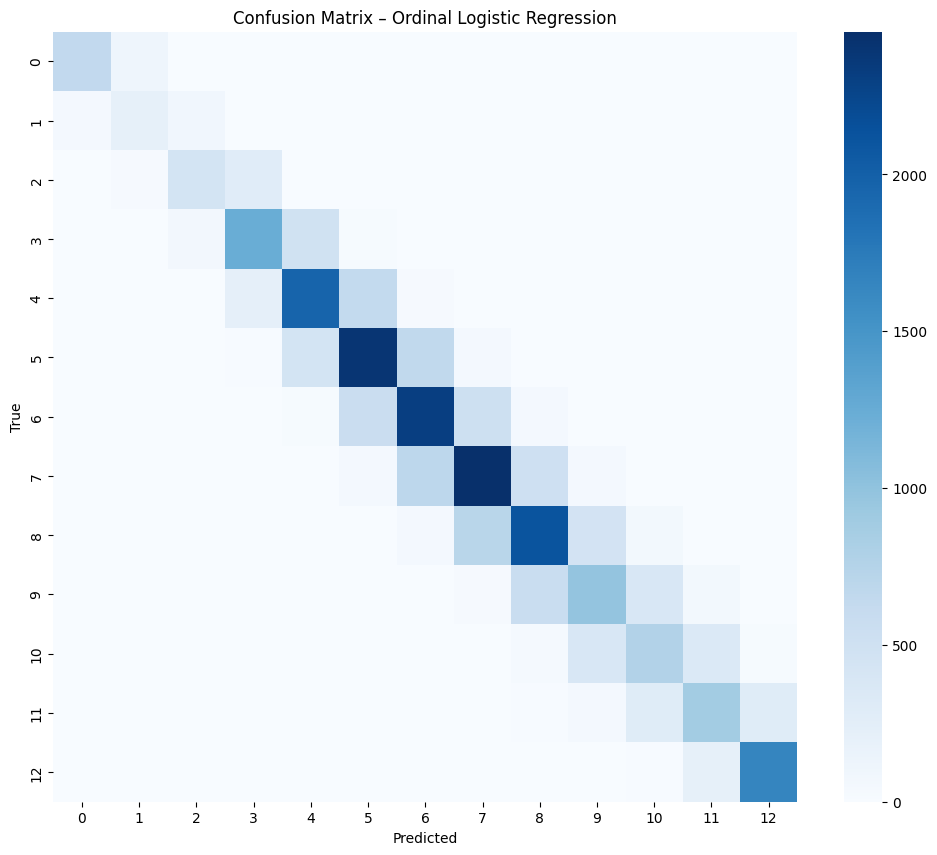

In [50]:
cm = confusion_matrix(y_logreg_test, y_pred_ordlog)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix – Ordinal Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Mulitnomial logistic regression (non-ordinal baseline)

In [51]:
from sklearn.linear_model import LogisticRegression

# Multinomial logistic regression model
model_multinom = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=500,
    n_jobs=-1
)

# Train the model
model_multinom.fit(X_logreg_train_scaled, y_logreg_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=500, multi_class='multinomial', n_jobs=-1)

In [52]:
#predictions
y_pred_multinom = model_multinom.predict(X_logreg_test_scaled)


In [53]:
kappa = cohen_kappa_score(y_logreg_test, y_pred_multinom, weights='quadratic')
print("Quadratic Weighted Kappa:", round(kappa, 4))

accuracy = accuracy_score(y_logreg_test, y_pred_multinom)
print("Accuracy:", round(accuracy, 4))

Quadratic Weighted Kappa: 0.9726
Accuracy: 0.6538


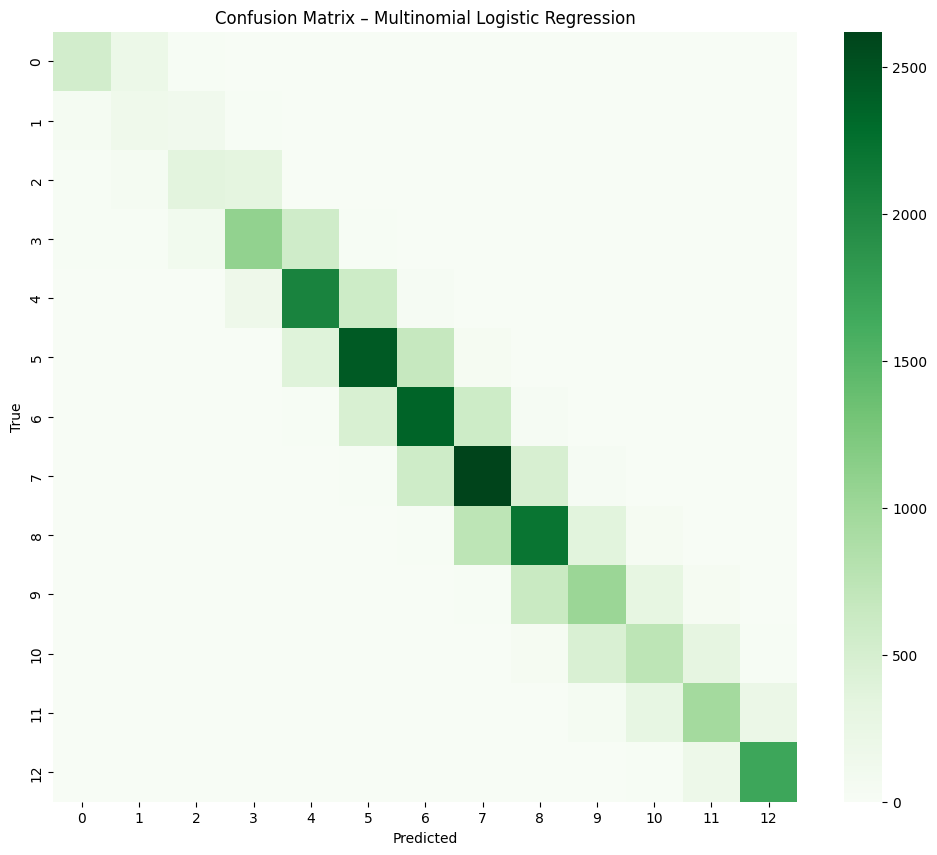

In [54]:
cm_multi = confusion_matrix(y_logreg_test, y_pred_multinom)

plt.figure(figsize=(12, 10))
sns.heatmap(cm_multi, annot=False, cmap="Greens")
plt.title("Confusion Matrix – Multinomial Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

CatBoost (best for ordinal target values)

In [55]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.4 MB/s eta 0:00:00


In [56]:
cat_features = X_tree_train.select_dtypes(include=["object"]).columns.tolist()
cat_features


['CountyName',
 'DwellingTypeDescr',
 'TypeofRating',
 'MainSpaceHeatingFuel',
 'MainWaterHeatingFuel',
 'MultiDwellingMPRN',
 'TGDLEdition',
 'SupplSHFuel',
 'SupplWHFuel',
 'SHRenewableResources',
 'WHRenewableResources',
 'DraftLobby',
 'VentilationMethod',
 'StructureType',
 'SuspendedWoodenFloor',
 'PermeabilityTest',
 'HeatSystemControlCat',
 'HeatSystemResponseCat',
 'CHBoilerThermostatControlled',
 'OBBoilerThermostatControlled',
 'OBPumpInsideDwelling',
 'WarmAirHeatingSystem',
 'StorageLosses',
 'ManuLossFactorAvail',
 'SolarHotWaterHeating',
 'ElecImmersionInSummer',
 'CombiBoiler',
 'KeepHotFacility',
 'InsulationType',
 'PrimaryCircuitLoss',
 'CylinderStat',
 'CombinedCylinder',
 'SWHPumpSolarPowered',
 'ThermalMassCategory',
 'PredominantRoofType',
 'HESSchemeUpgrade']

In [57]:
from catboost import CatBoostRegressor

model_cat = CatBoostRegressor(
    loss_function="RMSE",
    eval_metric="RMSE",
    iterations=2000,
    learning_rate=0.03,
    depth=8,
    l2_leaf_reg=5,
    random_seed=42,
    task_type="GPU",
    verbose=200,
    early_stopping_rounds=100
)

model_cat.fit(
    X_tree_train,
    y_tree_train,
    cat_features=cat_features,
    eval_set=(X_tree_test, y_tree_test),
    use_best_model=True
)


0:	learn: 2.7945681	test: 2.8563987	best: 2.8563987 (0)	total: 294ms	remaining: 9m 47s
200:	learn: 0.5028543	test: 0.6061443	best: 0.6061443 (200)	total: 23.9s	remaining: 3m 33s
400:	learn: 0.4337601	test: 0.5335716	best: 0.5335716 (400)	total: 32s	remaining: 2m 7s
600:	learn: 0.4020682	test: 0.5005211	best: 0.5005211 (600)	total: 41.7s	remaining: 1m 37s
800:	learn: 0.3837633	test: 0.4825023	best: 0.4825023 (800)	total: 51.4s	remaining: 1m 16s
1000:	learn: 0.3709654	test: 0.4712734	best: 0.4712734 (1000)	total: 60s	remaining: 59.9s
1200:	learn: 0.3609966	test: 0.4627344	best: 0.4627344 (1200)	total: 1m 9s	remaining: 46s
1400:	learn: 0.3527111	test: 0.4557257	best: 0.4557257 (1400)	total: 1m 19s	remaining: 33.8s
1600:	learn: 0.3459166	test: 0.4512087	best: 0.4512087 (1600)	total: 1m 28s	remaining: 22.1s
1800:	learn: 0.3398008	test: 0.4471602	best: 0.4471602 (1800)	total: 1m 36s	remaining: 10.7s
1999:	learn: 0.3343732	test: 0.4442908	best: 0.4442861 (1996)	total: 1m 47s	remaining: 0us
be

In [58]:
# Continuous predictions
y_pred_cont = model_cat.predict(X_tree_test)

# Round to nearest ordinal label index
y_pred_cat = (
    np.round(y_pred_cont)
    .clip(0, max(rating_to_num.values()))
    .astype(int)
)


In [59]:
kappa_cat = cohen_kappa_score(y_tree_test, y_pred_cat, weights='quadratic')
print("CatBoost Quadratic Weighted Kappa:", round(kappa_cat, 4))

acc_cat = accuracy_score(y_tree_test, y_pred_cat)
print("CatBoost Accuracy:", round(acc_cat, 4))

CatBoost Quadratic Weighted Kappa: 0.9853
CatBoost Accuracy: 0.7783


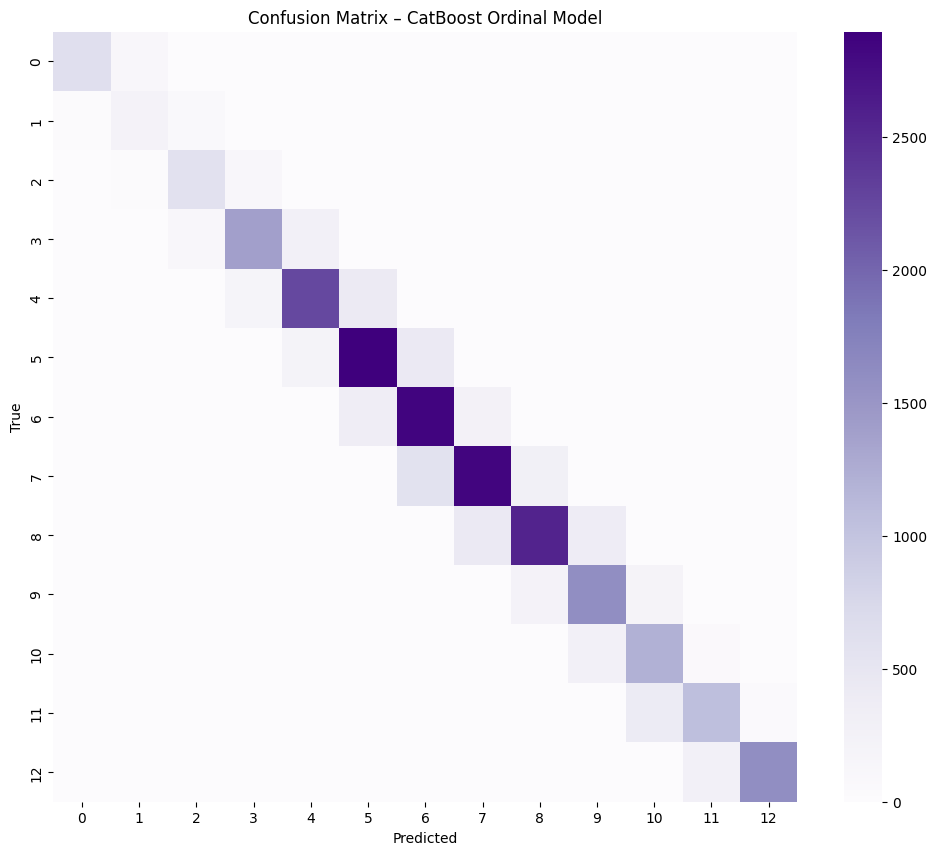

In [60]:
cm_cat = confusion_matrix(y_tree_test, y_pred_cat)

plt.figure(figsize=(12, 10))
sns.heatmap(cm_cat, cmap="Purples", annot=False)
plt.title("Confusion Matrix – CatBoost Ordinal Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()